In [18]:
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = "data.npy"

with open(file_path, "rb") as file:
    data_array = np.load(file)

In [4]:
# Assuming you already have the 'data_array' with shape (24, num_columns)
num_copies = 100

# Create an array of shape (num_copies, 1) to repeat 'data_array' vertically
repeated_array = np.tile(data_array, (num_copies, 1))

# Stack the repeated arrays vertically
data_array_extended = np.vstack(repeated_array)

print(data_array_extended.shape)


(2400, 45)


In [5]:
len(data_array_extended)

2400

In [6]:
def shift_data(data_array, window_size=5):
  X = []
  y = []
  for i in range(len(data_array_extended)-window_size):
    row = [r for r in data_array_extended[i:i+window_size]]
    X.append(row)
    label = [data_array_extended[i+window_size]]
    y.append(label)
  return np.array(X), np.array(y)



In [7]:
X,y = shift_data(data_array=data_array_extended)
X.shape, y.shape

((2395, 5, 45), (2395, 1, 45))

In [8]:
scalers_x = {}
for i in range(X.shape[2]):
    scalers_x[i] = MinMaxScaler().fit(X[:, :, i])

scalers_y = {}
for i in range(y.shape[2]):
    scalers_y[i] = MinMaxScaler()
    scalers_y[i] =  MinMaxScaler().fit(y[:, :, i]) 
 
for i in range(X.shape[2]):
    X[:, :, i] = scalers_x[i].transform(X[:, :, i])

for i in range(y.shape[2]):
    y[:, :, i] = scalers_y[i].transform(y[:, :, i]) 

In [13]:
X.shape

(2395, 5, 45)

In [15]:
X3_train, y3_train = X[:1800], y[:1800]
X3_val, y3_val = X[1800:2100], y[1800:2100]
X3_test, y3_test = X[2100:], y[2100:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((1800, 5, 45),
 (1800, 1, 45),
 (300, 5, 45),
 (300, 1, 45),
 (295, 5, 45),
 (295, 1, 45))

In [9]:
# for i in range(X.shape[2]):
#     X[:, :, i] = scalers_x[i].inverse_transform(X[:, :, i])

# for i in range(y.shape[2]):
#     y[:, :, i] = scalers_y[i].inverse_transform(y[:, :, i]) 
 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [11]:
model5 = Sequential()
model5.add(InputLayer((5, 45)))
model5.add(LSTM(64))
model5.add(Dense(18, 'relu'))
model5.add(Dense(45, 'linear'))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                28160     
                                                                 
 dense (Dense)               (None, 18)                1170      
                                                                 
 dense_1 (Dense)             (None, 45)                855       
                                                                 
Total params: 30,185
Trainable params: 30,185
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
50/57 [=========================>....] - ETA: 0s - loss: 0.2023 - root_mean_squared_error: 0.4498

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 12s 148ms/step - loss: 0.2015 - root_mean_squared_error: 0.4489 - val_loss: 0.1900 - val_root_mean_squared_error: 0.4361
Epoch 2/10
57/57 [==============================] - ETA: 0s - loss: 0.1815 - root_mean_squared_error: 0.4260

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 119ms/step - loss: 0.1815 - root_mean_squared_error: 0.4260 - val_loss: 0.1738 - val_root_mean_squared_error: 0.4172
Epoch 3/10
52/57 [==========================>...] - ETA: 0s - loss: 0.1695 - root_mean_squared_error: 0.4117

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 126ms/step - loss: 0.1688 - root_mean_squared_error: 0.4109 - val_loss: 0.1626 - val_root_mean_squared_error: 0.4035
Epoch 4/10
56/57 [============================>.] - ETA: 0s - loss: 0.1562 - root_mean_squared_error: 0.3952

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 6s 115ms/step - loss: 0.1562 - root_mean_squared_error: 0.3952 - val_loss: 0.1482 - val_root_mean_squared_error: 0.3851
Epoch 5/10
55/57 [===========================>..] - ETA: 0s - loss: 0.1402 - root_mean_squared_error: 0.3744

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 128ms/step - loss: 0.1401 - root_mean_squared_error: 0.3742 - val_loss: 0.1319 - val_root_mean_squared_error: 0.3633
Epoch 6/10
54/57 [===========================>..] - ETA: 0s - loss: 0.1255 - root_mean_squared_error: 0.3542

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 120ms/step - loss: 0.1253 - root_mean_squared_error: 0.3539 - val_loss: 0.1182 - val_root_mean_squared_error: 0.3439
Epoch 7/10
52/57 [==========================>...] - ETA: 0s - loss: 0.1129 - root_mean_squared_error: 0.3360

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 127ms/step - loss: 0.1125 - root_mean_squared_error: 0.3354 - val_loss: 0.1064 - val_root_mean_squared_error: 0.3264
Epoch 8/10
53/57 [==========================>...] - ETA: 0s - loss: 0.1017 - root_mean_squared_error: 0.3189

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 120ms/step - loss: 0.1015 - root_mean_squared_error: 0.3185 - val_loss: 0.0963 - val_root_mean_squared_error: 0.3104
Epoch 9/10
55/57 [===========================>..] - ETA: 0s - loss: 0.0923 - root_mean_squared_error: 0.3038

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 124ms/step - loss: 0.0921 - root_mean_squared_error: 0.3036 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2963
Epoch 10/10
57/57 [==============================] - ETA: 0s - loss: 0.0843 - root_mean_squared_error: 0.2903

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


57/57 [==============================] - 7s 121ms/step - loss: 0.0843 - root_mean_squared_error: 0.2903 - val_loss: 0.0806 - val_root_mean_squared_error: 0.2840


In [24]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0 ,0], y[:, 0 ,1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals':temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals
                            })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

In [23]:
y3_test.shape

(295, 1, 45)

10/10 [==============================] - 0s 4ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.316548,0.143779,0.496442,0.203434
1,0.312307,0.015269,0.489752,0.000000
2,0.309215,0.000000,0.489392,0.018277
3,0.298660,0.031893,0.478289,0.044930
4,0.295424,0.108934,0.484025,0.071282
...,...,...,...,...
95,0.312058,0.146255,0.509438,0.205999
96,0.316548,0.143779,0.496442,0.203434
97,0.312307,0.015269,0.489752,0.000000
98,0.309215,0.000000,0.489392,0.018277


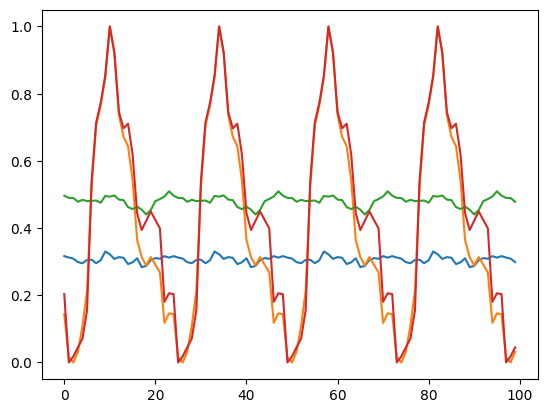

In [25]:
plot_predictions2(model5, X3_test, y3_test)